In [18]:
from keras.layers import *
from keras.models import Sequential
import matplotlib.pyplot as plt


In [19]:
# Build a Model 

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)        

In [20]:
#Dataset
from keras.datasets import mnist
from keras.utils import to_categorical
(XTrain,YTrain),(XTest,YTest) = mnist.load_data()

In [21]:
def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

XTrain,YTrain = preprocess_data(XTrain,YTrain)
print(XTrain.shape,YTrain.shape)

XTest,YTest = preprocess_data(XTest,YTest)
print(XTest.shape,YTest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [22]:
# Model Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(XTrain,YTrain,epochs=20,validation_split=0.1,batch_size=128)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.2075 - accuracy: 0.9340 - val_loss: 0.0878 - val_accuracy: 0.9810
Epoch 2/20
54000/54000 [==============================] - 4s 66us/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0440 - val_accuracy: 0.9895
Epoch 3/20
54000/54000 [==============================] - 4s 66us/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0416 - val_accuracy: 0.9915
Epoch 4/20
54000/54000 [==============================] - 4s 66us/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 5/20
54000/54000 [==============================] - 4s 66us/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0326 - val_accuracy: 0.9918
Epoch 6/20
54000/54000 [==============================] - 4s 66us/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0308 - val_accuracy: 0.9923
Epoch 7/20
54000/54000 [==============================] - 4s 67us/ste

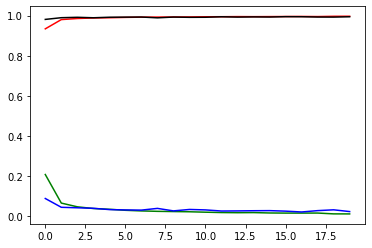

In [23]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [17]:
model.evaluate(XTest,YTest)

10000/10000 [==============================] - 1s 94us/step


[0.06832561327039836, 0.9869999885559082]

In [14]:
# Build a Model without Pooling?
# Why Pooling is Important -> Reduce Params, Increase Receptive Field of the Network!

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
#model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1982528   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 2,038,922
Trainable params: 2,038,922
Non-trainable params: 0
____________________________________________

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


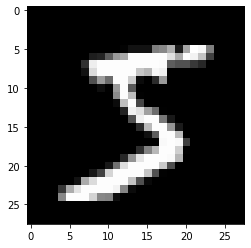

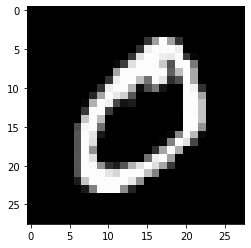

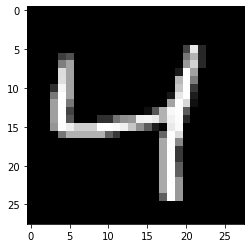

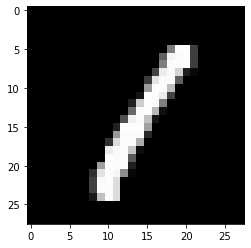

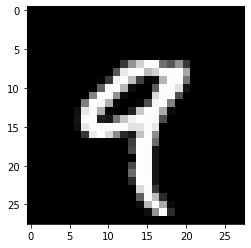

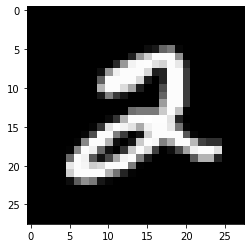

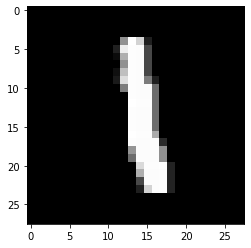

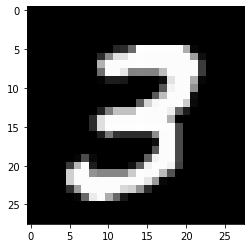

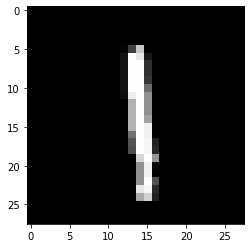

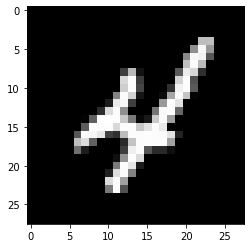

In [27]:
# example of loading the mnist dataset

# summarize loaded dataset
print('Train: X=%s, y=%s' % (XTrain.shape, YTrain.shape))
print('Test: X=%s, y=%s' % (XTest.shape, YTest.shape))
# plot first few images
for i in range(10):
    plt.imshow(XTrain[i].reshape(28,28),cmap='gray')
    plt.show()
plt.show()